In [279]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import DensityMatrix, partial_trace, Statevector
import numpy as np

In [280]:
n5 = 4
n6 = 5
n7 = 0
qc = QuantumCircuit(3,2)


In [281]:
norma = np.linalg.norm(np.array([n5+1, (n6+1)*np.exp(2j*np.pi*(n7+1)/11)]))
print(norma)
qc.prepare_state([(n5+1)/norma, (n6+1)*(np.exp(2j*np.pi*(n7+1)/11))/norma],0)
qc.h(1)
qc.cnot(1,2)
qc.draw()


7.810249675906654


┌─────────────────────────────────────────────┐     
q_0: ┤ State Preparation(0.64018,0.64627+0.41533j) ├─────
     └────────────────────┬───┬────────────────────┘     
q_1: ─────────────────────┤ H ├───────────────────────■──
                          └───┘                     ┌─┴─┐
q_2: ───────────────────────────────────────────────┤ X ├
                                                    └───┘
c: 2/════════════════════════════════════════════════════

In [282]:
qc.cnot(0,1)
qc.h(0)
qc.draw()
rho = DensityMatrix(qc)
qc2 = qc.copy()
qc3 = qc.copy()

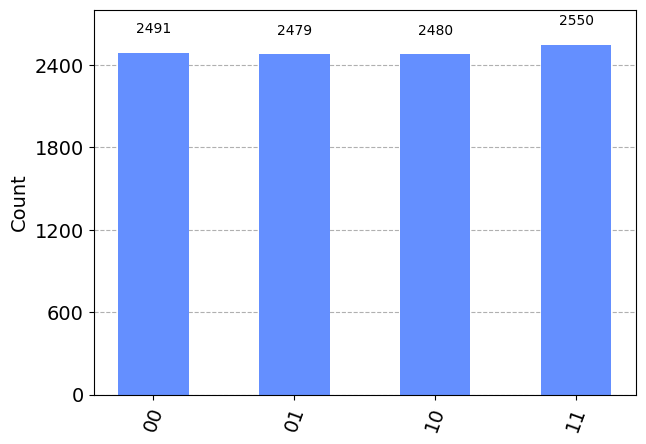

In [283]:
qc.measure([0, 1], [0, 1])
backend = Aer.get_backend('qasm_simulator')
backend_options = {'method': 'statevector'} 
result = execute(qc, backend, shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)



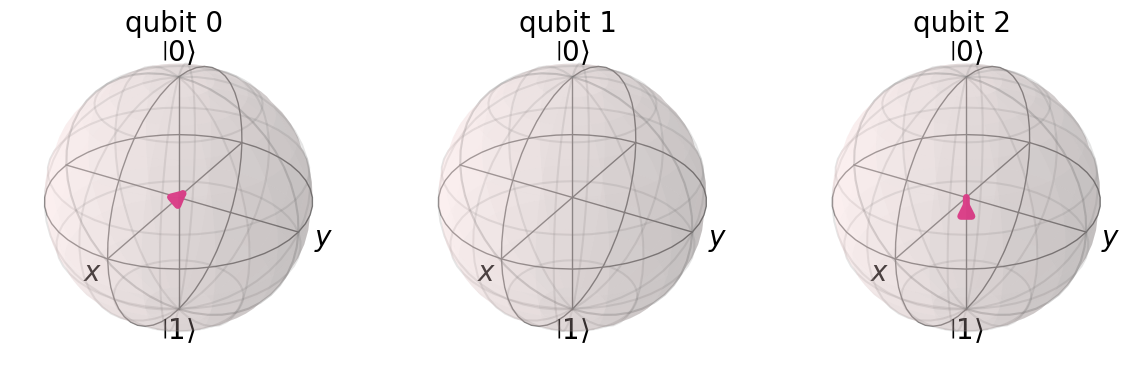

In [284]:

simulator =Aer.get_backend('statevector_simulator')
result2 =execute(qc2,simulator).result()
statevector =result2.get_statevector()
plot_bloch_multivector(statevector)

In [285]:
rho_a = partial_trace(state=rho, qargs=[0,1])
print(rho_a)

DensityMatrix([[0.5-6.9388939e-18j, 0. +0.0000000e+00j],
               [0. +0.0000000e+00j, 0.5-6.9388939e-18j]],
              dims=(2,))


In [286]:
qc3.z(2).c_if(qc.clbits[0], 1)
qc3.x(2).c_if(qc.clbits[1], 1)

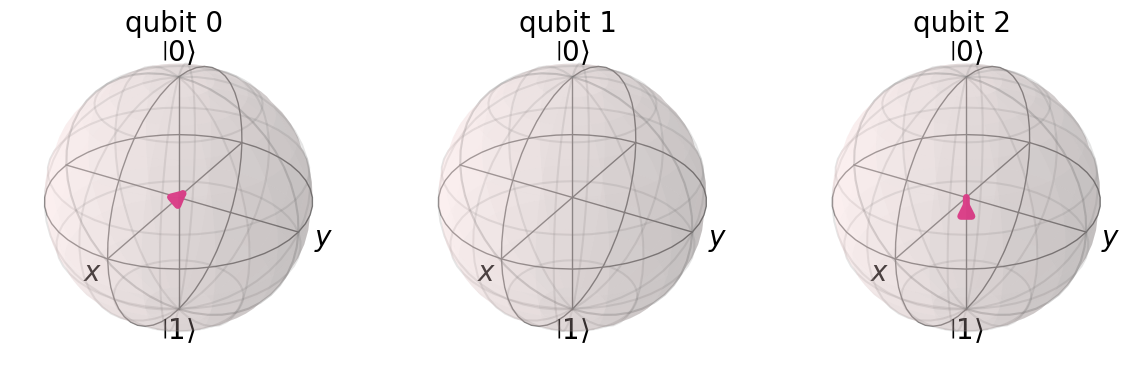

In [287]:
simulator =Aer.get_backend('statevector_simulator')
result2 =execute(qc3,simulator).result()
statevector =result2.get_statevector()
plot_bloch_multivector(statevector)